#  The Sparx Foundation
## GRIP21 
### Task 1 : Prediction using supervised ML model
### Author : Pushkar Zend





We have given the data of how many hours students study and their scores.
First we are going to import all the necessary libraries.


In [13]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score
%matplotlib inline

In [2]:
#reading the data set
data=pd.read_csv("http://bit.ly/w-data")
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [15]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [7]:
#Understanding the shape of the data
data.shape

(25, 2)

There are 25 rows and 2 columns in this data set.

In [4]:
#Now to understand the data properly
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Above information gives us the summary of the given data set.

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


There are no null values in the data.
As there is no null values in the data and nothing to clean. We are skipping the cleaning process.

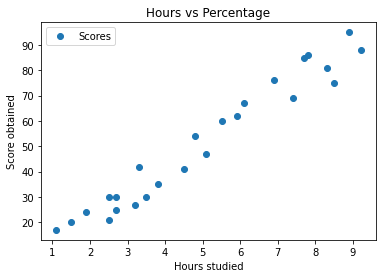

In [17]:
#Now we will plot the given data.
data.plot(x='Hours', y='Scores', style='o')    
plt.title('Hours vs Percentage')
plt.xlabel('Hours studied')
plt.ylabel('Score obtained')
plt.show()

We can see from the above plot that, there is direct relationship between the two variables scores and hours.

In [18]:
#we can show it through correlation
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


There is perfect positive correlation between given two variables.

In [24]:
#Now we are dividing the data into attributes and labels for the further training and testing of the data.
X = data.iloc[:, :-1].values    
Y = data.iloc[:, 1].values  

In [27]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [25]:
Y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [26]:
#Training and testing the model
from sklearn.model_selection import train_test_split    
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.2, random_state=0) 

Done with the splitting.

In [30]:
from sklearn.linear_model import LinearRegression    
regressor = LinearRegression()    
regressor.fit(X_train, Y_train)   
print("Training Completed !.")  

Training Completed !.


In [31]:
print('Intercept value is:',regressor.intercept_)
print('Linear coefficient is:',regressor.coef_) 

Intercept value is: 2.018160041434683
Linear coefficient is: [9.91065648]


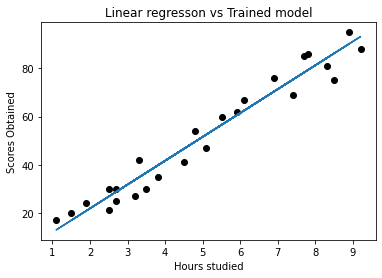

In [35]:
#Now we will plot the regression line.
#The equation of the regression line is
line = regressor.coef_*X+regressor.intercept_ 

#We will plot the test data.
plt.scatter(X,Y, c='Black')
plt.title('Linear regresson vs Trained model')
plt.xlabel('Hours studied')
plt.ylabel('Scores Obtained')
plt.plot(X,line)
plt.show()

In [38]:
#Predicting scores

Y_pred = regressor.predict(X_test)


In [39]:
Y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [40]:
#Comparing actual vs predicted values.
df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})    
df  

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


Now our given question is that "What will be predicted score if a student studies for 9.25 hrs/ day?"


In [42]:
hours = [[9.25]]  
own_pred = regressor.predict(hours)  
print("Number of hours = {}".format(hours))  
print("Prediction Score = {}".format(own_pred[0]))  

Number of hours = [[9.25]]
Prediction Score = 93.69173248737538


# Answer
## For a student studuying for 9.25 hours a day, then his/her predicted score will be 93.6917.